<a href="https://colab.research.google.com/github/RayBMGDias/challenge1-data-science-latam/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [2]:
from urllib.request import urlopen
import csv

urls = [url1, url2, url3, url4]

#função para ler a csv a partir da url
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
      linhas = resposta.read().decode('utf-8').splitlines()
      leitor = csv.DictReader(linhas)
      for linha in leitor:
        dados.append(linha)
    return dados

#anlise de faturamento
faturamento_total = 0

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    faturamento_loja = 0

    for venda in dados_loja:
      preco = float(venda['Preço']) #somando apenas o preço
      faturamento_loja += preco

    print(f'Faturamento Loja {i+1}: R${faturamento_loja:.2f}')
    faturamento_total += faturamento_loja

#mostrar faturamento total
print(f'\nFaturamento total de todas as lojas: R${faturamento_total:.2f}')


Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria


In [3]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
      linhas = resposta.read().decode('utf-8').splitlines()
      leitor = csv.DictReader(linhas)
      for linha in leitor:
        dados.append(linha)
    return dados

#dicionário para armazenar as vendas por categoria
vendas_por_categoria = {}

#processar todas as lojas
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    print(f'\nVendas por categoria na loja {i+1}:')

    #dicionario para loja atual
    categorias_loja = {}

    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        quantidade = int(venda['Quantidade de parcelas'])
        valor_venda = preco * quantidade

        #adicionar ao dicionário da loja atual
        if categoria in categorias_loja:
            categorias_loja[categoria] += valor_venda
        else:
            categorias_loja[categoria] = valor_venda

        #adicionar ao dicionário geral
        if categoria in vendas_por_categoria:
            vendas_por_categoria[categoria] += valor_venda
        else:
            vendas_por_categoria[categoria] = valor_venda

    #mostar resultados para esta loja
    for categoria, valor in categorias_loja.items():
        print(f'  {categoria}: R${valor:.2f}')

#mostar resultados totais
print('\nVendas totais por categoria (todas as lojas):')
for categoria, valor in vendas_por_categoria.items():
    print(f'  {categoria}: R${valor:.2f}')

#calcular o total geral
total_geral = sum(vendas_por_categoria.values())
print(f'\nTotal geral de vendas: R${total_geral:.2f}')


Vendas por categoria na loja 1:
  eletronicos: R$1720525.18
  moveis: R$777243.14
  brinquedos: R$65412.04
  eletrodomesticos: R$1376501.27
  utilidades domesticas: R$51092.72
  esporte e lazer: R$169179.18
  livros: R$34360.24
  instrumentos musicais: R$369322.34

Vendas por categoria na loja 2:
  moveis: R$703108.03
  instrumentos musicais: R$392599.48
  esporte e lazer: R$108879.57
  eletronicos: R$1715519.72
  utilidades domesticas: R$56984.93
  brinquedos: R$62300.37
  eletrodomesticos: R$1368304.66
  livros: R$41887.42

Vendas por categoria na loja 3:
  eletrodomesticos: R$1441845.38
  moveis: R$740123.50
  instrumentos musicais: R$333781.40
  esporte e lazer: R$164527.29
  eletronicos: R$1468443.69
  brinquedos: R$81591.72
  utilidades domesticas: R$59635.75
  livros: R$35142.69

Vendas por categoria na loja 4:
  eletrodomesticos: R$1172119.35
  moveis: R$742172.64
  esporte e lazer: R$133411.27
  livros: R$39390.51
  eletronicos: R$1615256.00
  instrumentos musicais: R$297117.

In [4]:
#função para calcular e mostrar as vendas por categoria de uma loja
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(f'\nVendas por categoria na loja {numero}:')
    print(vendas)

#mostrar resultados para cada loja
vendas_por_categoria(loja, 1)
vendas_por_categoria(loja2, 2)
vendas_por_categoria(loja3, 3)
vendas_por_categoria(loja4, 4)


Vendas por categoria na loja 1:
Categoria do Produto
brinquedos                23993.78
eletrodomesticos         484913.36
eletronicos              572659.23
esporte e lazer           52387.55
instrumentos musicais    121731.69
livros                    11713.92
moveis                   250178.11
utilidades domesticas     16931.48
Name: Preço, dtype: float64

Vendas por categoria na loja 2:
Categoria do Produto
brinquedos                21262.21
eletrodomesticos         464758.13
eletronicos              547773.71
esporte e lazer           46326.09
instrumentos musicais    139987.03
livros                    13454.35
moveis                   235234.68
utilidades domesticas     19662.86
Name: Preço, dtype: float64

Vendas por categoria na loja 3:
Categoria do Produto
brinquedos                25869.20
eletrodomesticos         438984.89
eletronicos              547699.92
esporte e lazer           47456.10
instrumentos musicais    103174.45
livros                    12664.70
moveis      

# 3. Média de Avaliação das Lojas

In [5]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        #decodificar os dads
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

#calcular a avaliação media para cada loja
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)

    #variáveis para calcular a média
    soma_avaliacoes = 0
    quantidade_produtos = 0

    for produto in dados_loja:
        try:
            if 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            else:
                #se não encontarmos a coluna, imprimimos as chaves disponíveis
                print(f'Chaves disponíveis na loja {i+1}:', produto.keys())
                raise KeyError('Nao encontramos a coluna de avaliação')

            soma_avaliacoes += avaliacao
            quantidade_produtos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            #ignoramos valores que não podem ser convertidos para float
            continue

    if quantidade_produtos > 0:
        avaliacao_media = soma_avaliacoes / quantidade_produtos
        print(f'A avaliação média da loja {i+1} é: {avaliacao_media:.2f}')
    else:
        print(f'Não foi possível processar as avaliações para a loja {i+1}')


A avaliação média da loja 1 é: 3.98
A avaliação média da loja 2 é: 4.04
A avaliação média da loja 3 é: 4.05
A avaliação média da loja 4 é: 4.00


In [6]:
def avaliacao_media(loja, numero):
    media = loja['Avaliação da compra'].mean()
    print(f'Avaliação média na loja {numero}: {media:.2f}')

#mostar resultados para cada loja
avaliacao_media(loja, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)

Avaliação média na loja 1: 3.98
Avaliação média na loja 2: 4.04
Avaliação média na loja 3: 4.05
Avaliação média na loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [7]:
from collections import defaultdict
from urllib.request import urlopen
import csv

def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

#função para calcular os top 3 produtos que mais e menos dinheiro geraram
def top_produtos(dados_loja, numero_loja):
    ingresso_por_produto = defaultdict(float)

    for venda in dados_loja:
        produto = venda['Produto']
        preco = float(venda['Preço'])
        ingresso_por_produto[produto] += preco

    #convertendo para lista ordenada
    produtos_ordenados = sorted(ingresso_por_produto.items(), key=lambda x: x[1], reverse=True)

    top_mais_vendidos= produtos_ordenados[:3]
    top_menos_vendidos = produtos_ordenados[-3:]

    print(f'\n{loja} - TOP 3 produtos que Mais dinheiro geraram:')
    for produto, ingresso in top_mais_vendidos:
        print(f' {produto} - Ingressos: R${ingresso:.2f}')

    print(f'\n{loja} - TOP 3 produtos que Mais dinheiro geraram:')
    for produto, ingresso in top_menos_vendidos:
        print(f' {produto} - Ingressos: R${ingresso:.2f}')

#percorrer todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    top_produtos(dados_loja, 1)


                    Produto Categoria do Produto    Preço      Frete  \
0        Assistente virtual          eletronicos   219.08   9.249790   
1            Mesa de jantar               moveis   256.35  11.234305   
2         Jogo de tabuleiro           brinquedos   279.51  21.262681   
3               Micro-ondas     eletrodomesticos  1009.99  54.667344   
4     Cadeira de escritório               moveis   446.99  26.964689   
...                     ...                  ...      ...        ...   
2354       Celular Plus X42          eletronicos  1712.54  88.772042   
2355             Impressora          eletronicos   377.02  20.363958   
2356      Jogo de tabuleiro           brinquedos   163.82   9.611337   
2357               Cama box               moveis   921.77  46.665919   
2358             Smartwatch          eletronicos   259.95  11.425995   

     Data da Compra        Vendedor Local da compra  Avaliação da compra  \
0        16/01/2021     Pedro Gomes              SP       

In [8]:
#ler todos os csvs e adicionar uma coluna 'loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f'Loja {i+1}') for i, url in enumerate(urls)],
    ignore_index=True
)

#garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

#a receita é simplesmente o preço (não multiplicamos pela quantidade de parcelas)
df_total['Receita'] = df_total['Preço']

#agrupar por loja e produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

#função para mostrar os 3 produtos que mais e menos dinheiro geraram
def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
    top_menos_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)

    print(f'\n{loja} - Top 3 produtos que Mais dinheiro geraram:')
    for _, linha in top_mais_vendidos.iterrows():
        print(f" {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f'\n{loja} - Top 3 produtos que Menos dinheiro geraram:')
    for _, linha in top_menos_vendidos.iterrows():
        print(f" {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

#lista única de lojas
lojas_unicas = vendas['Loja'].unique()

#mostar resultados para cada loja
for loja in lojas_unicas:
    top_produtos(loja)



Loja 1 - Top 3 produtos que Mais dinheiro geraram:
 TV Led UHD 4K - Receita: R$189534.28
 Geladeira - Receita: R$149524.28
 Celular Plus X42 - Receita: R$130536.40

Loja 1 - Top 3 produtos que Menos dinheiro geraram:
 TV Led UHD 4K - Receita: R$189534.28
 Geladeira - Receita: R$149524.28
 Celular Plus X42 - Receita: R$130536.40

Loja 2 - Top 3 produtos que Mais dinheiro geraram:
 Celular Plus X42 - Receita: R$150967.83
 TV Led UHD 4K - Receita: R$137833.06
 Geladeira - Receita: R$130176.48

Loja 2 - Top 3 produtos que Menos dinheiro geraram:
 Celular Plus X42 - Receita: R$150967.83
 TV Led UHD 4K - Receita: R$137833.06
 Geladeira - Receita: R$130176.48

Loja 3 - Top 3 produtos que Mais dinheiro geraram:
 Geladeira - Receita: R$133185.99
 TV Led UHD 4K - Receita: R$128892.11
 Celular Plus X42 - Receita: R$124300.84

Loja 3 - Top 3 produtos que Menos dinheiro geraram:
 Geladeira - Receita: R$133185.99
 TV Led UHD 4K - Receita: R$128892.11
 Celular Plus X42 - Receita: R$124300.84

Loja 4

# 5. Frete Médio por Loja


In [9]:
def calcular_envio_promedio(dados_loja, numero_loja):
    custos_envio = []

    for venda in dados_loja:
        custo_envio = float(venda['Frete'])
        custos_envio.append(custo_envio)

    envio_promedio = sum(custos_envio) / len(custos_envio) if custos_envio else 0

    print(f'Loja {numero_loja} - Envio médio: R${envio_promedio:.2f}')

#processar todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    calcular_envio_promedio(dados_loja, i)

Loja 1 - Envio médio: R$34.69
Loja 2 - Envio médio: R$33.62
Loja 3 - Envio médio: R$33.07
Loja 4 - Envio médio: R$31.28


In [10]:
#garantir que o custo de envio é numérico
df_total['Frete'] = df_total['Frete'].astype(float)

#agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean()

#mostar resultados
print('\nEnvio médio por loja:')
for loja, medio in envio_medio.items():
    print(f'{loja}: R${medio:.2f}')


Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


##Gráficos

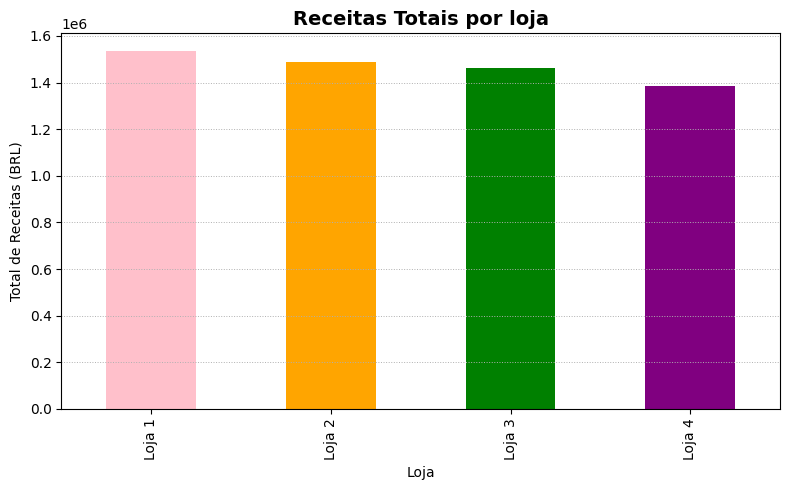

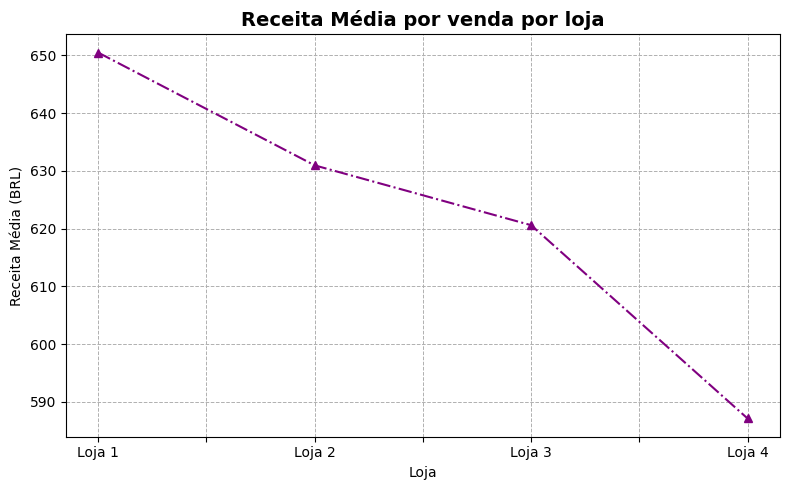

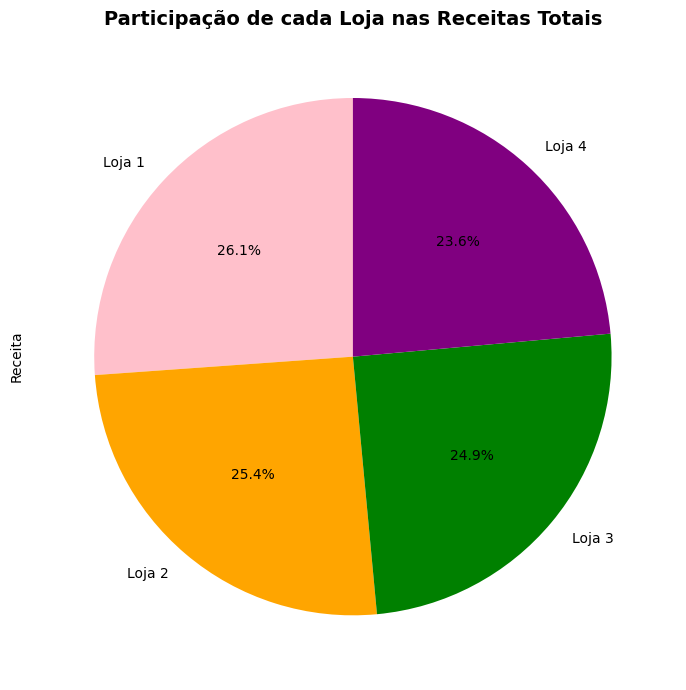

In [18]:
import matplotlib.pyplot as plt

#garantir tipo correto
df_total['Preço'] = df_total['Preço'].astype(float)

#a receita de cada venda é simplismente o preço
df_total['Receita'] = df_total['Preço']

#agrupar dados
receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()
distribuicao_receitas = receitas_totais

#paleta personalizada
colors = ['pink', 'orange', 'green', 'purple']

#gerar 3 gráficos diferentes

#1. Barra vertical: Total de receitas
plt.figure(figsize=(8,5))
receitas_totais.plot(kind='bar', color=colors)
plt.title('Receitas Totais por loja', fontsize=14, fontweight='bold')
plt.ylabel('Total de Receitas (BRL)')
plt.xlabel('Loja')
plt.grid(axis='y', linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()

#2. linha: Receita media de venda
plt.figure(figsize=(8,5))
receita_media.plot(kind='line', marker='^', linestyle='-.', color='purple')
plt.title('Receita Média por venda por loja', fontsize=14, fontweight='bold')
plt.ylabel('Receita Média (BRL)')
plt.xlabel('Loja')
plt.grid(True, linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

#3. Pizza: Distribuição do total
plt.figure(figsize=(7,7))
distribuicao_receitas.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Participação de cada Loja nas Receitas Totais', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.tight_layout()
plt.show()